In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt
from lsst.sims.utils import raDec2Hpid
import os
import healpy as hp

In [2]:
# Load up my catalog of stars observed by GAIA
ack = np.load('0_33578_gum_mag_cat.npz')
stars = ack['result_cat'].copy()
ack.close()

In [3]:
bins = np.arange(16, 21, 0.2)
rms = np.zeros(bins.size-1, dtype=float)
resids = stars['g_true'] - stars['g']
for i, dummy in enumerate(bins[:-1]):
    good = np.where((stars['g_true'] >= bins[0]) & (stars['g_true'] < bins[i+1]))
    rms[i] = np.std(resids[good])

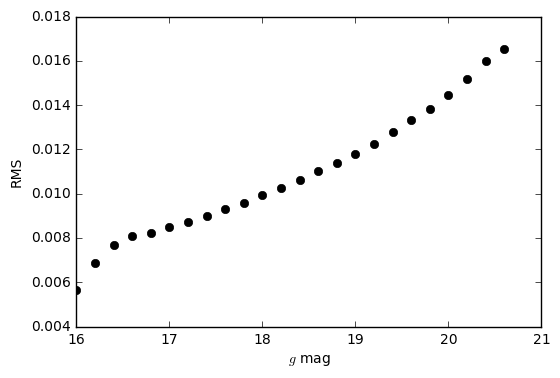

In [5]:
plt.plot(bins[:-1], rms, 'ko')
plt.xlabel('$g$ mag')
plt.ylabel('RMS')

In [6]:
bright_limit = 15.
faint_limit = 20.

stars = stars[np.where((stars['u_true'] > bright_limit) & (stars['u_true'] < faint_limit))]
print 'Number of stars = %i' % stars.size

Number of stars = 13007


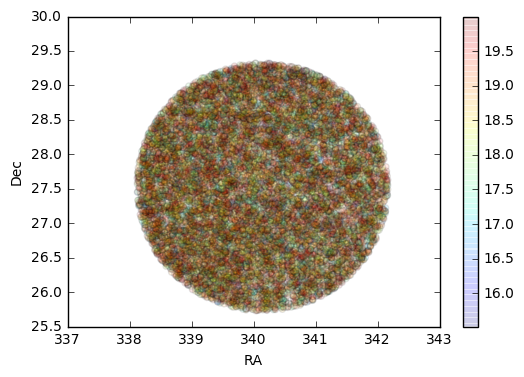

In [7]:
plt.scatter(stars['raj2000'], stars['dej2000'], c=stars['u_true'], alpha=.1)
plt.colorbar()
plt.xlabel('RA')
plt.ylabel('Dec')

In [8]:
m5_u = 23.68  # From overview paper
lsst_snr = 5.*10.**(-0.4*(stars['u_true']-m5_u))
lsst_err = 1./lsst_snr
phot_floor = 0.003 # 3 millimag noise floor
lsst_err = (lsst_err**2 + phot_floor**2)**0.5

# 

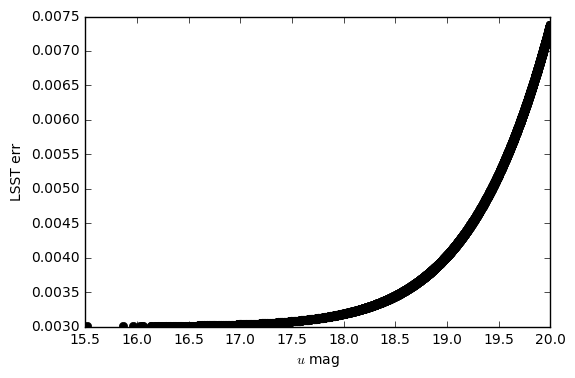

In [9]:
plt.plot(stars['u_true'], lsst_err, 'ko')
plt.xlabel('$u$ mag')
plt.ylabel('LSST err')

In [10]:
# Approximate raft and chip selections
ra_mid = (stars['raj2000'].max() - stars['raj2000'].min())/2. + stars['raj2000'].min()
dec_mid = (stars['dej2000'].max() - stars['dej2000'].min())/2. + stars['dej2000'].min()
ra_range = stars['raj2000'].max() - stars['raj2000'].min()
dec_range = stars['dej2000'].max() - stars['dej2000'].min()
center_raft = np.where( (stars['raj2000'] > ra_mid-ra_range/5./2.) & (stars['raj2000'] < ra_mid+ra_range/5./2.) &
                       (stars['dej2000'] > dec_mid-dec_range/5./2.) & (stars['dej2000'] < dec_mid+dec_range/5./2.))
center_chip = np.where( (stars['raj2000'] > ra_mid-ra_range/15./2.) & (stars['raj2000'] < ra_mid+ra_range/15./2.) &
                       (stars['dej2000'] > dec_mid-dec_range/15./2.) & (stars['dej2000'] < dec_mid+dec_range/15./2.))
selections = {'center_raft': center_raft, 'center_chip': center_chip}

In [11]:
print 'number of central raft stars = %i' % center_raft[0].size
print 'number of central chip stars = %i' % center_chip[0].size


number of central raft stars = 626
number of central chip stars = 72


In [12]:
# define the additional error that GAIA will have
gaia_err_add = [0.005, 0.01, 0.02, 0.05]

In [13]:
print 'GAIA error,  selected area, zeropoint error'
for gaia_err in gaia_err_add:
    for selection in selections:
        sigma_total_sq = lsst_err[selections[selection]]**2+(lsst_err[selections[selection]]**2+gaia_err**2)
        sigma_zp = 1./np.sqrt(np.sum(1./sigma_total_sq))
        print '%f, %s, %f' % (gaia_err, selection, sigma_zp)

GAIA error,  selected area, zeropoint error
0.005000, center_raft, 0.000303
0.005000, center_chip, 0.000884
0.010000, center_raft, 0.000465
0.010000, center_chip, 0.001365
0.020000, center_raft, 0.000836
0.020000, center_chip, 0.002461
0.050000, center_raft, 0.002014
0.050000, center_chip, 0.005936


In [14]:
# Let's scale things down to the galactic pole where there are only ~20% as may stars
center_raft = np.random.choice(center_raft[0], size=center_raft[0].size/5.)
center_chip = np.random.choice(center_chip[0], size=center_chip[0].size/5.)
selections = {'center_raft': center_raft, 'center_chip': center_chip}
print 'number of central raft stars = %i' % center_raft.size
print 'number of central chip stars = %i' % center_chip.size


number of central raft stars = 125
number of central chip stars = 14


/Users/yoachim/lsst/DarwinX86/miniconda2/3.19.0.lsst4/lib/python2.7/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app
/Users/yoachim/lsst/DarwinX86/miniconda2/3.19.0.lsst4/lib/python2.7/site-packages/ipykernel/__main__.py:3: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()


In [15]:
print 'GAIA error,  selected area, zeropoint error'
for gaia_err in gaia_err_add:
    for selection in selections:
        sigma_total_sq = lsst_err[selections[selection]]**2+(lsst_err[selections[selection]]**2+gaia_err**2)
        sigma_zp = 1./np.sqrt(np.sum(1./sigma_total_sq))
        print '%f, %s, %f' % (gaia_err, selection, sigma_zp)

GAIA error,  selected area, zeropoint error
0.005000, center_raft, 0.000673
0.005000, center_chip, 0.001941
0.010000, center_raft, 0.001037
0.010000, center_chip, 0.003036
0.020000, center_raft, 0.001869
0.020000, center_chip, 0.005541
0.050000, center_raft, 0.004506
0.050000, center_chip, 0.013443
